### 5.1 **Plot Ambiguity Functions**

Plot the 2-D ambiguity functions for the following waveforms:

* a) Simple Pulse: 

    $
        u(t) = \text{rect}\left(\frac{t}{T_p}\right)
    $



* b) Gaussian Pulse: 


    $
        u(t) = \exp\left(-\pi \frac{t^2}{T_p^2}\right)
    $



* c) Chirp A: 


   $
        u(t) = \text{rect}\left(\frac{t}{T_p}\right) \cdot \exp(j\pi k_r t^2), \quad k_r = \frac{10}{T_p^2}
   $



* d) Chirp B: 


    $
        u(t) = \exp\left(-\pi \frac{t^2}{T_p^2}\right) \cdot \exp(j\pi k_r t^2), \quad k_r = \frac{10}{T_p^2}
    $




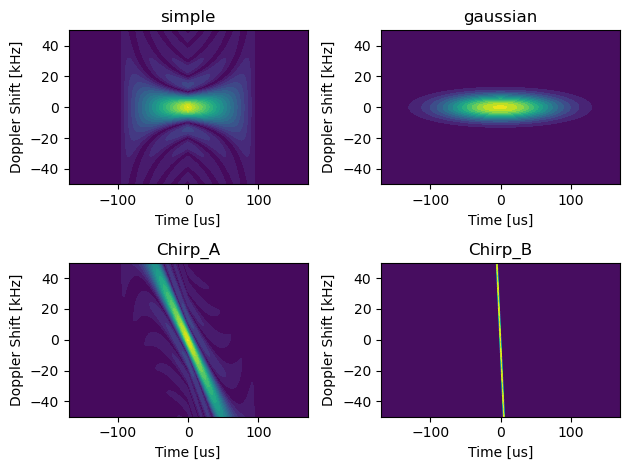

In [5]:
import numpy as np
import matplotlib.pyplot as plt

    
def matched_filter_response(u,h):
    U_f=np.fft.fft(u)
    H_f=np.fft.fft(h)
    response=np.fft.ifft(U_f*H_f)
    return np.fft.fftshift(response)

def simple_pulse(t,Tp):
    u_t=np.where(np.abs(t)<Tp/2,1,0)
    return u_t

def Gaussian_pulse(t,Tp):
    u_t=np.exp(-np.pi*(t**2/Tp**2))
    return u_t

def chirp_A(t,Tp):
    kr=10/Tp**2
    u_t=np.where(np.abs(t)<Tp/2,np.exp(1j*np.pi*kr*t**2),0)
    return u_t

def chirp_B(t,Tp):
    kr=100/Tp**2
    u_t=Gaussian_pulse(t,Tp)*np.exp(1j*np.pi*kr*t**2)
    return u_t

def matched_filter(t,Tp,type):
    if type=='simple':
        u=simple_pulse(t,Tp)
        h=np.conj(u[::-1])
        return h
    elif type=='gaussian':
        u=Gaussian_pulse(t,Tp)
        h=np.conj(u[::-1])
        return h
    elif type=='Chirp_A':
        u=chirp_A(t,Tp)
        h=np.conj(u[::-1])
        return h
    elif type =='Chirp_B':
        u=chirp_B(t,Tp)
        h=np.conj(u[::-1])
        return h
Tp=100e-6
t_min,t_max=-1.7*Tp,1.7*Tp
fmin,fmax=-5/Tp,5/Tp
Nt=1025
Nf=512
t=np.linspace(t_min,t_max,Nt)
f=np.linspace(fmin,fmax,Nf)

def ambiguity_function(u,h,fD,t):
    u_dt=u*np.exp(1j*2*np.pi*fD*t)
    A=matched_filter_response(u_dt,h)
    return A
AF=np.zeros([Nf,Nt],dtype=np.complex128)
waveforms=[simple_pulse,Gaussian_pulse,chirp_A,chirp_B]
types=['simple','gaussian','Chirp_A','Chirp_B']
fig,ax=plt.subplots(2,2)
for wave, type in zip(waveforms,types):
    for i in range(Nf):
        u=wave(t,Tp)
        h=matched_filter(t,Tp,type)
        AF[i,:]=ambiguity_function(u,h,f[i],t)
    ax[waveforms.index(wave)//2,types.index(type)%2].contourf(t/1e-6,f/1e3,np.abs(AF),20)   
    ax[waveforms.index(wave)//2,types.index(type)%2].set_xlabel("Time [us]")
    ax[waveforms.index(wave)//2,types.index(type)%2].set_ylabel("Doppler Shift [kHz]")
    ax[waveforms.index(wave)//2,types.index(type)%2].set_title(type)
plt.tight_layout()
plt.show()


### 5.2 **Ambiguity Function of Simple Pulse**

Assume an S-band airport surveillance radar operates with a frequency of $ f = 2.8 \, \text{GHz}$  and transmits radar pulses of duration $T = 200 \, \mu\text{s}$ . The radar acquires radar echoes from 4 airplanes that move all towards the radar with the same speed of  $v = 1000 \, \text{km/h}$ . The angles between the line-of-sight vectors and the velocity vectors are  $\theta = \{0^\circ, 30^\circ, 60^\circ, 90^\circ\} $.
- Compute the corresponding Doppler shift for each airplane.
- Use the previously derived ambiguity function to plot the response of the matched filter tuned to $ f_D = 0 \, \text{Hz} .$
- How do the responses change if the airplanes move away from the radar?
- What is the maximum pulse length such that the loss due to the mismatch between the radar echo and the processing filter is less than 3 dB for all possible flight directions?

Repeat the previous simulations for an automotive radar operating at $ f = 77 \, \text{GHz} $ for a car driving with $ v = 200 \, \text{km/h} $. What is the maximum allowed pulse length such that the losses remain below 3 dB?


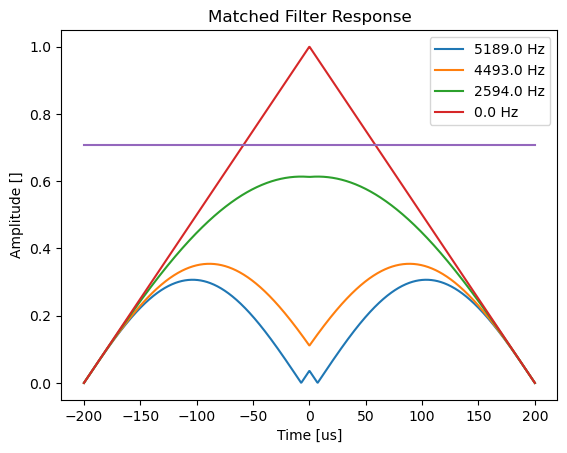

In [17]:
#2
import numpy as np
import matplotlib.pyplot as plt

def ambiguity(t,fD,T):
    u_t=np.exp(1j*2*np.pi*fD*t)*np.where(np.abs(t)<T,1,0)*(1-np.abs(t)/T)*np.sinc(fD*(T-np.abs(t)))
    return u_t

f=2.8e9
c=2.998e8
la_da=c/f
Tp=200e-6
vel=1000*5/18
theta=np.deg2rad(np.array([0,30,60,90]))
fD=np.array([2*vel/la_da*np.cos(t) for t in theta])
t=np.linspace(-Tp,Tp,1000)
for f in fD:
    u_t=ambiguity(t,f,Tp)
    plt.plot(t*1e6,np.abs(u_t),label=str(np.rint(f))+" Hz")
plt.plot(t*1e6,1/np.sqrt(2.0)*np.ones(t.size))
plt.title("Matched Filter Response")
plt.xlabel("Time [us]")
plt.ylabel("Amplitude []")
plt.legend()
plt.show()



### 5.3 **Ambiguity Function of LFM Waveform**

Repeat your previous simulations of the airport surveillance radar with the following modification: assume now an X-band radar ($ f = 10 \, \text{GHz} $) transmitting LFM pulses with a bandwidth of $ B = 100 \, \text{kHz} $ and a pulse duration of $ T = 100 \, \mu \text{s} $.

- What is the range resolution at the matched filter output (assume the zero-Doppler case, i.e. $ \theta = 90^\circ $)?
- What is the chirp rate $ k_r $ and what is the value of the time-bandwidth product $ TBP = k_r B $?
- By what factor is the range resolution improved by using the LFM waveform if compared to the simple pulse of the same length?
- How large are the Doppler shifts for the four different flight directions?
- How do the matched filter responses differ for the four radial velocities?
- Do the observed time shifts match to the analytically predicted values?
- How large may the target velocity become such that the loss at the matched filter output is always less than -3 dB?


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# def ambiguity(t,fD,T):
#     u_t=np.exp(1j*2*np.pi*fD*t)*np.where(np.abs(t)<T,1,0)*(1-np.abs(t)/T)*np.sinc(fD*(T-np.abs(t)))
#     return u_t

f0=10e9
B=100e3
Tp=100e-6
kr=B/Tp
c=2.998e8
wl=c/f0
theta=np.deg2rad(np.array([0.,30,60,90]))
v=1000*5/18


#a)
print(f"Range Resolution: {c/(2*B)} ")
#b)
print(f"Chirp Rate Kr:{kr} and Time Bandwidth Product (TBP):{B*Tp}")
#c)
print(f"Improvement of Range Resolution :{B*Tp}")
#d)
fD=((2*v)/wl)*np.cos(theta)
print(f"Doppler Shifts for {np.rad2deg(theta)} deg are {np.rint(fD)} Hz")

print(f"Time Shifts for {np.rad2deg(theta)} deg are {-1*fD/kr} s")

print(f"Range Shifts for {np.rad2deg(theta)} deg are {-1*fD/kr*c/2} m")


Range Resolution: 1499.0 
Chirp Rate Kr:1000000000.0 and Time Bandwidth Product (TBP):10.0
Improvement of Range Resolution :10.0
Doppler Shifts for [ 0. 30. 60. 90.] deg are [18531. 16048.  9265.     0.] Hz
Time Shifts for [ 0. 30. 60. 90.] deg are [-1.85308724e-05 -1.60482063e-05 -9.26543622e-06 -1.13468868e-21] s
Range Shifts for [ 0. 30. 60. 90.] deg are [-2.77777778e+03 -2.40562612e+03 -1.38888889e+03 -1.70089833e-13] m


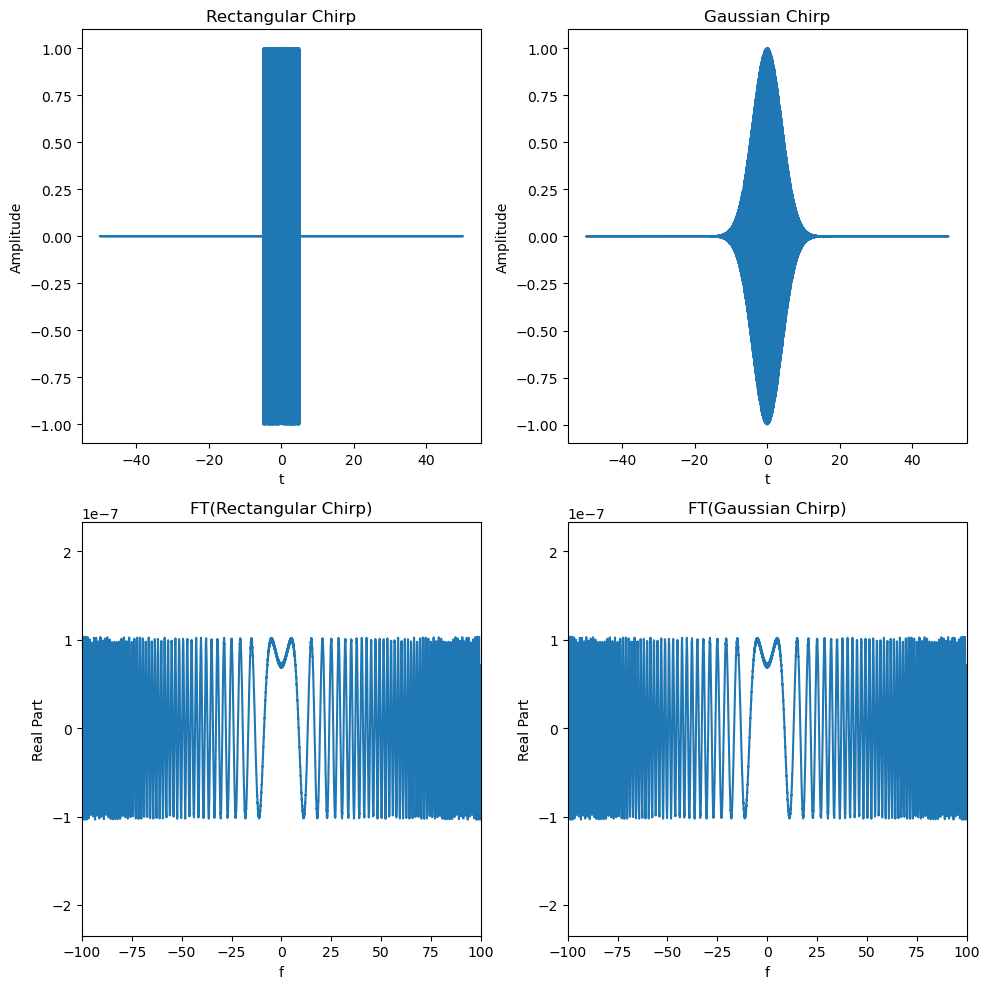

In [21]:
#4
import numpy as np
import matplotlib.pyplot as plt
Tp=10e-6
B=100e6
k=10e13
# stat_rect=f/k
# stat_gauss=f*Tp**2*1j/(1j*k*Tp**2-1)
def rect_chirp(t,Tp):
    r_t=np.where(np.abs(t)<Tp/2,1,0)
    u_t=r_t*np.exp(1j*k*np.pi*t**2)
    return u_t
def gaussian_chirp(t,Tp):
    g_t=np.exp(-np.pi*t**2/Tp**2)
    u_t=g_t*np.exp(1j*k*np.pi*t**2)
    return u_t
N = 2**16
T_tot = 10*Tp
dt = T_tot/N
t = (np.arange(N)-N//2)*dt
t = np.roll(t,-N//2)
u_rect=rect_chirp(t,Tp)
u_gauss=gaussian_chirp(t,Tp)
u_rect_f=np.fft.fft(u_rect)*dt
u_gauss_f=np.fft.fft(u_gauss)*dt
f=np.fft.fftfreq(N,dt)

fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2,figsize=(10,10))
ax0.plot(t*1e6,u_rect)
ax0.set_title("Rectangular Chirp")
ax0.set_xlabel("t")
ax0.set_ylabel("Amplitude")
ax1.plot(t*1e6,u_gauss)
ax1.set_title("Gaussian Chirp")
ax1.set_xlabel("t")
ax1.set_ylabel("Amplitude")
ax2.plot(np.fft.fftshift(f)/1e6,np.fft.fftshift(np.real(u_rect_f)))
ax2.set_title("FT(Rectangular Chirp)")
ax2.set_xlabel("f")
ax2.set_xlim(-100,100)
ax2.set_ylabel("Real Part")
ax3.plot(np.fft.fftshift(f)/1e6,np.fft.fftshift(np.real(u_rect_f)))
ax3.set_title("FT(Gaussian Chirp)")
ax3.set_xlim(-100,100)
ax3.set_xlabel("f")
ax3.set_ylabel("Real Part")
plt.tight_layout()
plt.show()
